<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#!pip install xgboost

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost
from xgboost import XGBRegressor

## Load and Prepare Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sampleSubmission.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# import train & test data:

In [6]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [7]:
# preprocess datetime column for train data :

In [8]:
train['hour']=train['datetime'].dt.hour
train['day']=train['datetime'].dt.day
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train.drop('datetime',axis=1,inplace=True)

In [9]:
# preprocess datetime column for test data :

In [10]:
test['hour']=test['datetime'].dt.hour
test['day']=test['datetime'].dt.day
test['month']=test['datetime'].dt.month
test['year']=test['datetime'].dt.year
test.drop('datetime',axis=1,inplace=True)

In [11]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [12]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011


## EDA

In [13]:
train.shape

(10886, 15)

In [14]:
test.shape

(6493, 12)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  day         10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  year        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   hour        6493 non-null   int64  
 9   day         6493 non-null   int64  
 10  month       6493 non-null   int64  
 11  year        6493 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 608.8 KB


## Data Preprocessing

In [17]:
#drop some columns in train data according to test data

In [18]:
train.drop(columns=['casual', 'registered'],inplace=True)

## Strorytelling - Visualization

C:\Users\Special One\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

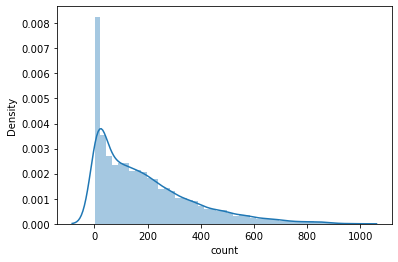

In [19]:
sns.distplot(train['count'])

In [20]:
train_corr = train.corr()['count'].sort_values()
train_corr

humidity     -0.317371
weather      -0.128655
holiday      -0.005393
workingday    0.011594
day           0.019826
windspeed     0.101369
season        0.163439
month         0.166862
year          0.260403
atemp         0.389784
temp          0.394454
hour          0.400601
count         1.000000
Name: count, dtype: float64

## Train your model (Regression)

In [21]:
# in train data :

In [22]:
X=train.drop('count',axis=True)
y=train['count']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [25]:
# Linear Regression Model :

In [26]:
regressor=LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
y_train_pred=regressor.predict(X_train)

In [29]:
y_pred=regressor.predict(X_test)

In [30]:
r2_score(y_train,y_train_pred)

0.38963769679735094

In [31]:
r2_score(y_test,y_pred)

0.3877202487751037

In [32]:
# Create a polynomial regression models :

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
   
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     

y_train_predicted = quadratic.predict(X_train_quadratic)
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [ ]:
r2_score(y_train,y_train_predicted)

In [ ]:
r2_score(y_test,y_test_predicted)

In [ ]:
#XGBoost Model :

In [ ]:
model = XGBRegressor(learning_rate = 0.1)
model.fit(X_train,y_train)
X_train_pred_xgboost=model.predict(X_train)

In [ ]:
r2_score(y_train,X_train_pred_xgboost)

In [ ]:
y_pred_xgboost=model.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_xgboost)

In [ ]:
# select XGBoost for main Model :

In [ ]:
count_sub=model.predict(test)

## Test Result

In [ ]:
sub

In [ ]:
sub['count']=count_sub

In [ ]:
sub

In [ ]:
sub.to_csv('sampleSubmission.csv' , index=False)

## Send us the Result (Maktabkhoone)